In [1]:
import chaospy as cp
import sampling_method as sm
import numpy as np
import convergence_rate_f as crf
import compare_sti as cst
%matplotlib inline

In [2]:
%%time
k = [10, 19]
#k = dimension
N = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
#N = sample of size
leng = len(N)
R = 50
#replicated R times
NN = int(leng*R)
#define variations of the test function

Wall time: 0 ns


In [3]:
%%time
test_function = "V-function"
#choose test function
kk = k[0]
#choose dimension
a = sm.create_coefficient_a(kk, "A1-2")
#set up test case

Wall time: 0 ns


In [4]:
%%time
#chaospy Sobol
rule1 = "S"
#chaospy Latin Hypercube
rule2 = "L"
#Random
rule3 = "R"

Wall time: 0 ns


In [5]:
%%time
er_si_N_1, er_sti_N_11, er_sti_N_12 = cst.n_calculate_compare_sti(kk, N, a, R, rule1, test_function)
#calculate estimated S_i, S_ti_1(Jansen 1999), S_ti_2(Sobol' 2007) for rule1

Wall time: 18min 31s


In [6]:
%%time
er_si_N_2, er_sti_N_21, er_sti_N_22 = cst.n_calculate_compare_sti(kk, N, a, R, rule2, test_function)
#calculate estimated S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for rule2

Wall time: 12min 16s


In [7]:
%%time
er_si_N_3, er_sti_N_31, er_sti_N_32 = cst.n_calculate_compare_sti(kk, N, a, R, rule3, test_function)
#calculate estimated S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for rule3

Wall time: 12min 17s


In [8]:
%%time
er_si_max_1 = er_si_N_1[(NN-R):NN, :]
er_sti_max_11 = er_sti_N_11[(NN-R):NN, :]
er_sti_max_12 = er_sti_N_12[(NN-R):NN, :]
#get the S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) of rule1 for max N 

Wall time: 0 ns


In [9]:
%%time
er_si_max_2 = er_si_N_2[(NN-R):NN, :]
er_sti_max_21 = er_sti_N_21[(NN-R):NN, :]
er_sti_max_22 = er_sti_N_22[(NN-R):NN, :]
#get the S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) of rule2 for max N 

Wall time: 0 ns


In [10]:
%%time
er_si_max_3 = er_si_N_3[(NN-R):NN, :]
er_sti_max_31 = er_sti_N_31[(NN-R):NN, :]
er_sti_max_32 = er_sti_N_32[(NN-R):NN, :]
#get the S_i and S_ti(Jansen 1999), S_ti_2(Sobol' 2007) of rule3 for max N 

Wall time: 0 ns


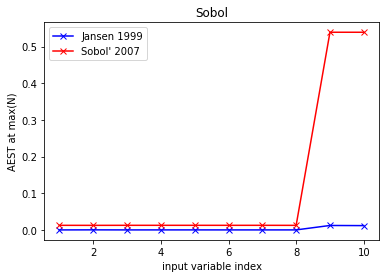

Wall time: 132 ms


In [11]:
%%time
name_1 = "Sobol"
cst.draw_aest_compare_plot(kk, a, R, er_si_max_1, er_sti_max_11, er_sti_max_12, name_1)
#draw comparison plot i-wise errors AEST at max N for S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for Sobol

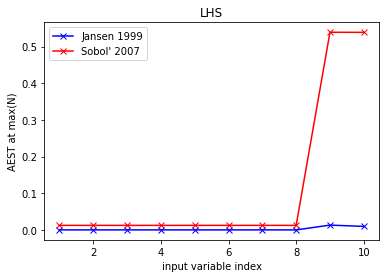

Wall time: 130 ms


In [12]:
%%time
name_2 = "LHS"
cst.draw_aest_compare_plot(kk, a, R, er_si_max_2, er_sti_max_21, er_sti_max_22, name_2)
#draw comparison plot i-wise errors AEST at max N for S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for LHS

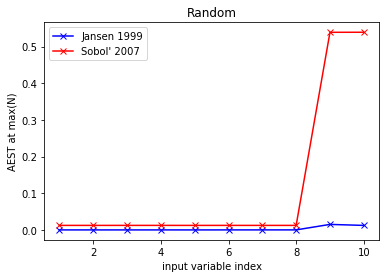

Wall time: 123 ms


In [13]:
%%time
name_3 = "Random"
cst.draw_aest_compare_plot(kk, a, R, er_si_max_3, er_sti_max_31, er_sti_max_32, name_3)
#draw comparison plot i-wise errors AEST at max N for S_ti(Jansen 1999), S_ti_2(Sobol' 2007) for Random

In [14]:
%%time
aes_1_N, aest_11_N, aest_12_N = cst.aes_aest_N(N, kk, R, a, er_si_N_1, er_sti_N_11, er_sti_N_12)
maes_1, maest_11, maest_12 = cst.maes_maest_N(N, kk, aes_1_N, aest_11_N, aest_12_N)
#calculate convergence MAES and MAEST with both S_ti way for rule1

Wall time: 10 ms


In [15]:
%%time
aes_2_N, aest_21_N, aest_22_N = cst.aes_aest_N(N, kk, R, a, er_si_N_2, er_sti_N_21, er_sti_N_22)
maes_2, maest_21, maest_22 = cst.maes_maest_N(N, kk, aes_2_N, aest_21_N, aest_22_N)
#calculate convergence MAES and MAEST with both S_ti way for rule2

Wall time: 5 ms


In [16]:
%%time
aes_3_N, aest_31_N, aest_32_N = cst.aes_aest_N(N, kk, R, a, er_si_N_3, er_sti_N_31, er_sti_N_32)
maes_3, maest_31, maest_32 = cst.maes_maest_N(N, kk, aes_3_N, aest_31_N, aest_32_N)
#calculate convergence MAES and MAEST with both S_ti way for rule3

Wall time: 10 ms


In [17]:
%%time
name_z = ["Sobol MAEST - Jansen 1999", "Sobol MAEST - Sobol' 2007"
          , "LHS MAEST - Jansen 1999", "LHS MAEST - Sobol' 2007"
         , "Random MAEST - Jansen 1999", "Random MAEST - Sobol' 2007"]
z_11 = crf.convergence_rate(N, maest_11, name_z[0])
z_12 = crf.convergence_rate(N, maest_12, name_z[1])
z_21 = crf.convergence_rate(N, maest_21, name_z[2])
z_22 = crf.convergence_rate(N, maest_22, name_z[3])
z_31 = crf.convergence_rate(N, maest_31, name_z[4])
z_32 = crf.convergence_rate(N, maest_32, name_z[5])

Sobol MAEST - Jansen 1999 convergence rate =  0.868189152522
-------------------------------------
Sobol MAEST - Sobol' 2007 convergence rate =  0.0839696743113
-------------------------------------
LHS MAEST - Jansen 1999 convergence rate =  0.601581977445
-------------------------------------
LHS MAEST - Sobol' 2007 convergence rate =  0.037835988747
-------------------------------------
Random MAEST - Jansen 1999 convergence rate =  0.667265191045
-------------------------------------
Random MAEST - Sobol' 2007 convergence rate =  0.0682979976711
-------------------------------------
Wall time: 8 ms


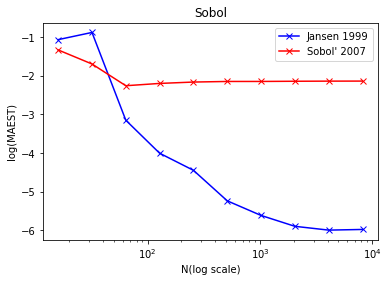

Wall time: 509 ms


In [18]:
%%time
cst.draw_maest_compare_plot(N, maest_11, maest_12, name_1)
#draw convergence log(MAEST) comparison plot for Sobol

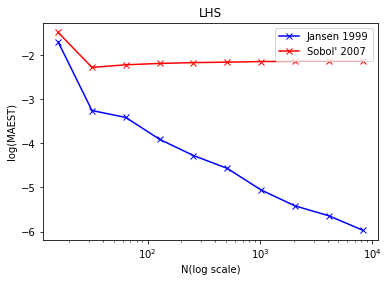

Wall time: 280 ms


In [19]:
%%time
cst.draw_maest_compare_plot(N, maest_21, maest_22, name_2)
#draw convergence log(MAEST) comparison plot for LHS

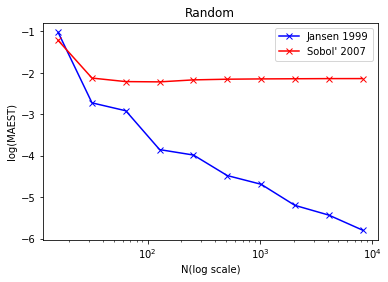

Wall time: 325 ms


In [20]:
%%time
cst.draw_maest_compare_plot(N, maest_31, maest_32, name_3)
#draw convergence log(MAEST) comparison plot for Random

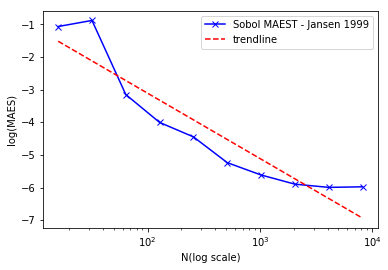

Wall time: 297 ms


In [21]:
%%time
crf.check_trend_line(z_11, N, maest_11, name_z[0])

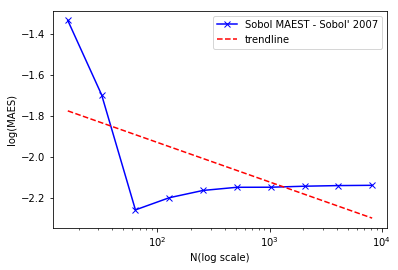

Wall time: 286 ms


In [22]:
%%time
crf.check_trend_line(z_12, N, maest_12, name_z[1])

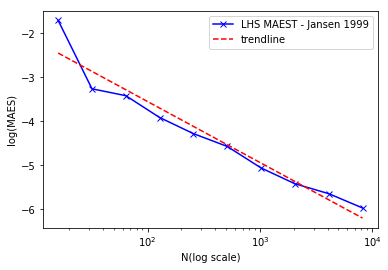

Wall time: 289 ms


In [23]:
%%time
crf.check_trend_line(z_21, N, maest_21, name_z[2])

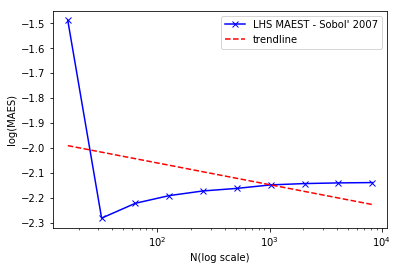

Wall time: 311 ms


In [24]:
%%time
crf.check_trend_line(z_22, N, maest_22, name_z[3])

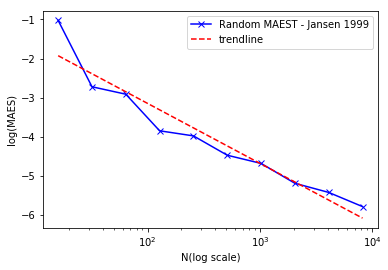

Wall time: 345 ms


In [25]:
%%time
crf.check_trend_line(z_31, N, maest_31, name_z[4])

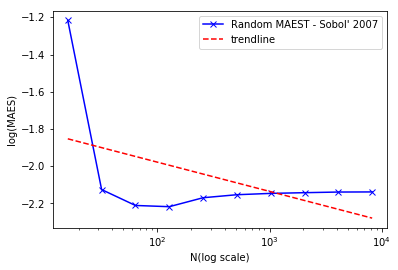

Wall time: 294 ms


In [26]:
%%time
crf.check_trend_line(z_32, N, maest_32, name_z[5])

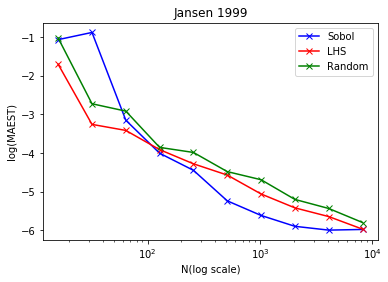

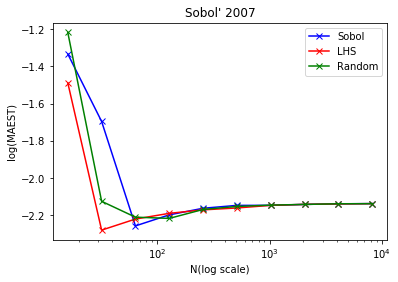

Wall time: 612 ms


In [27]:
%%time
cst.draw_maest_plot(N, maest_11, maest_21, maest_31, maest_12, maest_22, maest_32)